In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import PetThermoTools as M
import Thermobar as pt
import pickle

sys.path.append(r'G:\My Drive\2022\GitHub\PetThermoTools\MELTS')

import time
import random
from tqdm.notebook import tqdm, trange

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
Data = pd.read_excel('Plag2Pyx\LowP.xlsx')

In [3]:
New = pt.convert_fo2_to_fe_partition(liq_comps = Data, T_K = Data['T_K'], P_kbar = Data['P_kbar'], 
                              fo2 = 10**Data['logfo2'], model = "Kress1991")

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq']
Comp = New[Elements].copy()
Comp['CO2_Liq'] = np.zeros(len(Comp['SiO2_Liq']))
Comp['P_kbar_true'] = Data['P_kbar']

C:\Users\Matt Gleeson\AppData\Roaming\Python\Python38\site-packages\Thermobar\core.py:3949: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


In [4]:
with open('P_result_v120_full.obj', 'rb') as f:
    P_results = pickle.load(f)
    
# with open('P_results2.obj', 'rb') as f:
#     P_results2 = pickle.load(f)
    
# with open('P_results3.obj', 'rb') as f:
#     P_results3 = pickle.load(f)
    
with open('P_result_v102_full.obj', 'rb') as f:
    P_results_v102 = pickle.load(f)

# with open('P_result_v102_2.obj', 'rb') as f:
#     P_results_v102_2 = pickle.load(f)
    
# with open('P_result_v102_3.obj', 'rb') as f:
#     P_results_v102_3 = pickle.load(f)

In [116]:
Data.keys()

Index(['Phase', 'Citation', 'Experiment', 'Sample_ID_Liq', 'SiO2_Liq',
       'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq',
       'Na2O_Liq', 'K2O_Liq', 'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq',
       'DeltaNNO_MELTS', 'logfo2', 'T_K', 'P_kbar'],
      dtype='object')

In [23]:
Comp['P_kbar_calc'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_calc_min'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan

Comp['P_kbar_calc_ab'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_calc_min_ab'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan

Comp['P_kbar_calc_ac'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_calc_min_ac'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan

Comp['P_kbar_calc_v102'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_calc_v102_min'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan

Comp['P_kbar_calc_v102_ab'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_calc_v102_min_ab'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan

Comp['P_kbar_calc_v102_ac'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_calc_v102_min_ac'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan

P_bar = np.linspace(100,7500,38)/1000

for i in P_results:
    Loc = np.where(P_results[i]['Res_abc'][0,0,:] == np.nanmin(P_results[i]['Res_abc']))
    if Loc is not None:
        Comp['P_kbar_calc'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
        Comp['P_kbar_calc_min'].loc[int(i)] = np.nanmin(P_results_v102[i]['Res_abc'])
        
for i in P_results_v102:
    Loc = np.where(P_results_v102[i]['Res_abc'][0,0,:] == np.nanmin(P_results_v102[i]['Res_abc']))
    if Loc is not None:
        Comp['P_kbar_calc_v102'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
        Comp['P_kbar_calc_v102_min'].loc[int(i)] = np.nanmin(P_results_v102[i]['Res_abc'])
        
#     Comp['P_kbar_calc'].loc[int(i)] = P_results[i]['CurveMin']['Res_abc']['P_min']
#     Comp['P_kbar_calc_min'].loc[int(i)] = P_results[i]['CurveMin']['Res_abc']['Res_min']
#     Comp['P_kbar_calc_ab'].loc[int(i)] = P_results[i]['CurveMin']['Res_ab']['P_min']
#     Comp['P_kbar_calc_min_ab'].loc[int(i)] = P_results[i]['CurveMin']['Res_ab']['Res_min']
#     Comp['P_kbar_calc_ac'].loc[int(i)] = P_results[i]['CurveMin']['Res_ac']['P_min']
#     Comp['P_kbar_calc_min_ac'].loc[int(i)] = P_results[i]['CurveMin']['Res_ac']['Res_min']
    
# for i in P_results2:
#     Comp['P_kbar_calc'].loc[int(i)] = P_results2[i]['CurveMin']['Res_abc']['P_min']
#     Comp['P_kbar_calc_min'].loc[int(i)] = P_results2[i]['CurveMin']['Res_abc']['Res_min']
#     Comp['P_kbar_calc_ab'].loc[int(i)] = P_results2[i]['CurveMin']['Res_ab']['P_min']
#     Comp['P_kbar_calc_min_ab'].loc[int(i)] = P_results2[i]['CurveMin']['Res_ab']['Res_min']
#     Comp['P_kbar_calc_ac'].loc[int(i)] = P_results2[i]['CurveMin']['Res_ac']['P_min']
#     Comp['P_kbar_calc_min_ac'].loc[int(i)] = P_results2[i]['CurveMin']['Res_ac']['Res_min']
    
# for i in P_results3:
#     Comp['P_kbar_calc'].loc[int(i)] = P_results3[i]['CurveMin']['Res_abc']['P_min']
#     Comp['P_kbar_calc_min'].loc[int(i)] = P_results3[i]['CurveMin']['Res_abc']['Res_min']
#     Comp['P_kbar_calc_ab'].loc[int(i)] = P_results3[i]['CurveMin']['Res_ab']['P_min']
#     Comp['P_kbar_calc_min_ab'].loc[int(i)] = P_results3[i]['CurveMin']['Res_ab']['Res_min']
#     Comp['P_kbar_calc_ac'].loc[int(i)] = P_results3[i]['CurveMin']['Res_ac']['P_min']
#     Comp['P_kbar_calc_min_ac'].loc[int(i)] = P_results3[i]['CurveMin']['Res_ac']['Res_min']
    
# for i in P_results_v102:
#     Comp['P_kbar_calc_v102'].loc[int(i)] = P_results_v102[i]['CurveMin']['Res_abc']['P_min']
#     Comp['P_kbar_calc_v102_min'].loc[int(i)] = P_results_v102[i]['CurveMin']['Res_abc']['Res_min']
#     Comp['P_kbar_calc_v102_ab'].loc[int(i)] = P_results_v102[i]['CurveMin']['Res_ab']['P_min']
#     Comp['P_kbar_calc_v102_min_ab'].loc[int(i)] = P_results_v102[i]['CurveMin']['Res_ab']['Res_min']
#     Comp['P_kbar_calc_v102_ac'].loc[int(i)] = P_results_v102[i]['CurveMin']['Res_ac']['P_min']
#     Comp['P_kbar_calc_v102_min_ac'].loc[int(i)] = P_results_v102[i]['CurveMin']['Res_ac']['Res_min']
    
# for i in P_results_v102_2:
#     Comp['P_kbar_calc_v102'].loc[int(i)] = P_results_v102_2[i]['CurveMin']['Res_abc']['P_min']
#     Comp['P_kbar_calc_v102_min'].loc[int(i)] = P_results_v102_2[i]['CurveMin']['Res_abc']['Res_min']
#     Comp['P_kbar_calc_v102_ab'].loc[int(i)] = P_results_v102_2[i]['CurveMin']['Res_ab']['P_min']
#     Comp['P_kbar_calc_v102_min_ab'].loc[int(i)] = P_results_v102_2[i]['CurveMin']['Res_ab']['Res_min']
#     Comp['P_kbar_calc_v102_ac'].loc[int(i)] = P_results_v102_2[i]['CurveMin']['Res_ac']['P_min']
#     Comp['P_kbar_calc_v102_min_ac'].loc[int(i)] = P_results_v102_2[i]['CurveMin']['Res_ac']['Res_min']
    
# for i in P_results_v102_3:
#     Comp['P_kbar_calc_v102'].loc[int(i)] = P_results_v102_3[i]['CurveMin']['Res_abc']['P_min']
#     Comp['P_kbar_calc_v102_min'].loc[int(i)] = P_results_v102_3[i]['CurveMin']['Res_abc']['Res_min']
#     Comp['P_kbar_calc_v102_ab'].loc[int(i)] = P_results_v102_3[i]['CurveMin']['Res_ab']['P_min']
#     Comp['P_kbar_calc_v102_min_ab'].loc[int(i)] = P_results_v102_3[i]['CurveMin']['Res_ab']['Res_min']
#     Comp['P_kbar_calc_v102_ac'].loc[int(i)] = P_results_v102_3[i]['CurveMin']['Res_ac']['P_min']
#     Comp['P_kbar_calc_v102_min_ac'].loc[int(i)] = P_results_v102_3[i]['CurveMin']['Res_ac']['Res_min']

C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_14332/737667930.py:22: RuntimeWarning: All-NaN slice encountered
  Loc = np.where(P_results[i]['Res_abc'][0,0,:] == np.nanmin(P_results[i]['Res_abc']))
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_14332/737667930.py:24: RuntimeWarning: Mean of empty slice
  Comp['P_kbar_calc'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_14332/737667930.py:25: RuntimeWarning: All-NaN slice encountered
  Comp['P_kbar_calc_min'].loc[int(i)] = np.nanmin(P_results_v102[i]['Res_abc'])
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_14332/737667930.py:28: RuntimeWarning: All-NaN slice encountered
  Loc = np.where(P_results_v102[i]['Res_abc'][0,0,:] == np.nanmin(P_results_v102[i]['Res_abc']))
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_14332/737667930.py:30: RuntimeWarning: Mean of empty slice
  Comp['P_kbar_calc_v102'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_14332/737667

In [24]:
Comp['P_kbar_calc_min']

0      18.0
1      14.0
2      23.0
3      56.0
4       NaN
5       NaN
6      32.0
7      17.0
8      37.0
9       NaN
10      NaN
11      NaN
12      7.0
13     34.0
14     44.0
15     25.0
16      NaN
17      NaN
18    114.0
19      NaN
20      NaN
21      NaN
22    190.0
23      NaN
24      NaN
25     95.0
26    109.0
27      5.0
28    114.0
29     89.0
30      NaN
31      NaN
32      NaN
33     21.0
34     21.0
35     26.0
36     50.0
37     52.0
Name: P_kbar_calc_min, dtype: float64

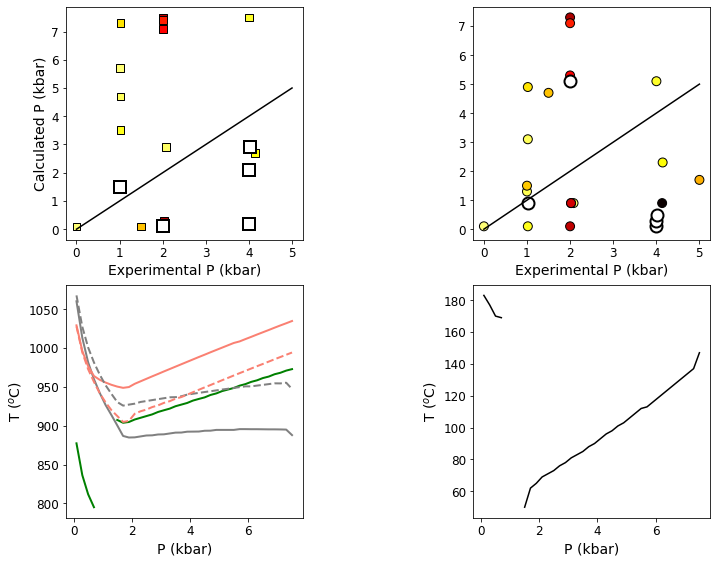

In [91]:
sample = '36'
f, a = plt.subplots(2,3, figsize = (10,8), gridspec_kw={'width_ratios': [2, 0.5, 2]} )
f.tight_layout(pad = 2)
a[0][1].set_visible(False)
a[1][1].set_visible(False)


s = a[0][0].scatter(Comp['P_kbar_true'], Comp['P_kbar_calc'], 60, c = Comp['P_kbar_calc_min'], 
             edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 's')
a[0][2].scatter(Comp['P_kbar_true'], Comp['P_kbar_calc_v102'], 80, c = Comp['P_kbar_calc_v102_min'], 
             edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 'o')
a[0][0].plot([0,5],[0,5], '-k')
a[0][0].set_xlabel('Experimental P (kbar)')
a[0][0].set_ylabel('Calculated P (kbar)')
#f.colorbar(s, ax=a[0][1], label='$\Delta$T')

T_cut = 20
# a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_min'] < T_cut], 
#           Comp['P_kbar_calc'][Comp['P_kbar_calc_min'] < T_cut], 'sr', markeredgecolor = 'k', markersize = 10)
# a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_v102_min'] < T_cut], 
#           Comp['P_kbar_calc_v102'][Comp['P_kbar_calc_v102_min'] < T_cut], 'ob', markeredgecolor = 'k', markersize = 8)
a[0][0].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_min'] < T_cut], 
                    Comp['P_kbar_calc'][Comp['P_kbar_calc_min'] < T_cut], 'sw', markersize = 12, markeredgecolor = 'k', mew = 2)
a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_v102_min'] < T_cut], 
                Comp['P_kbar_calc_v102'][Comp['P_kbar_calc_v102_min'] < T_cut], 'ow', markersize = 12, markeredgecolor = 'k', mew = 2)
a[0][2].plot([0,5],[0,5], '-k')
a[0][2].set_xlabel('Experimental P (kbar)')

a[1][2].plot(P_bar, P_results_v102[sample]['Res_abc'][0,0,:], '-k')
a[1][2].plot(P_bar, P_results[sample]['Res_abc'][0,0,:], '--k')
a[1][2].set_ylabel('T ($^{o}$C)')
a[1][2].set_xlabel('P (kbar)')

#ax1 = a[1][0].twinx()
a[1][0].plot(P_bar, P_results_v102[sample]['a_sat'][0,0,:], '-', linewidth = 2, color = [0.5,0.5,0.5])
a[1][0].plot(P_bar, P_results_v102[sample]['b_sat'][0,0,:], '-g', linewidth = 2)
a[1][0].plot(P_bar, P_results_v102[sample]['c_sat'][0,0,:], '-', linewidth = 2, color = 'salmon')
#a[1][0].set_ylim([1000,1250])
a[1][0].set_ylabel('T ($^{o}$C)')
#a[1][0].set_yticks(ticks = [1050,1100,1150,1200,1250])
a[1][0].set_xlabel('P (kbar)')

a[1][0].plot(P_bar, P_results[sample]['a_sat'][0,0,:], '--', linewidth = 2, color = [0.5,0.5,0.5])
a[1][0].plot(P_bar, P_results[sample]['b_sat'][0,0,:], '--g', linewidth = 2)
a[1][0].plot(P_bar, P_results[sample]['c_sat'][0,0,:], '--', linewidth = 2, color = 'salmon')
# ax1.set_ylim([850,1250])
# ax1.set_yticks(ticks = [1050,1100,1150,1200,1250])

C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_14332/3363153525.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, a = plt.subplots(2,3, figsize = (10,8), gridspec_kw={'width_ratios': [2, 0.5, 2]} )


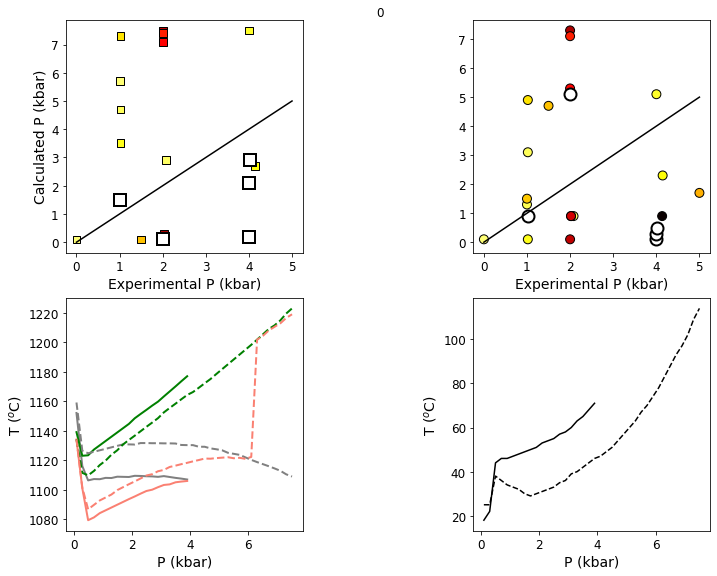

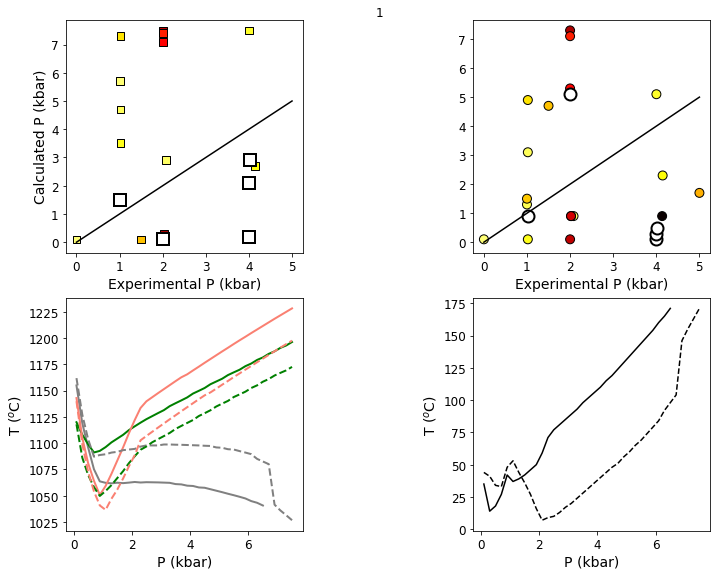

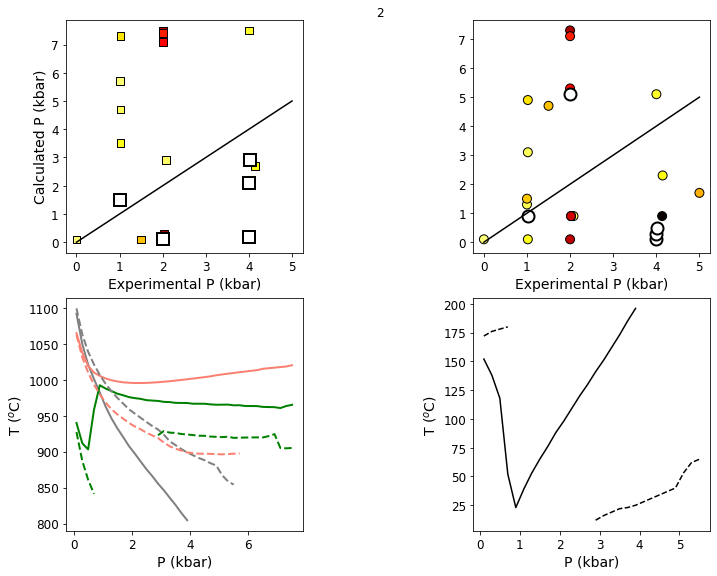

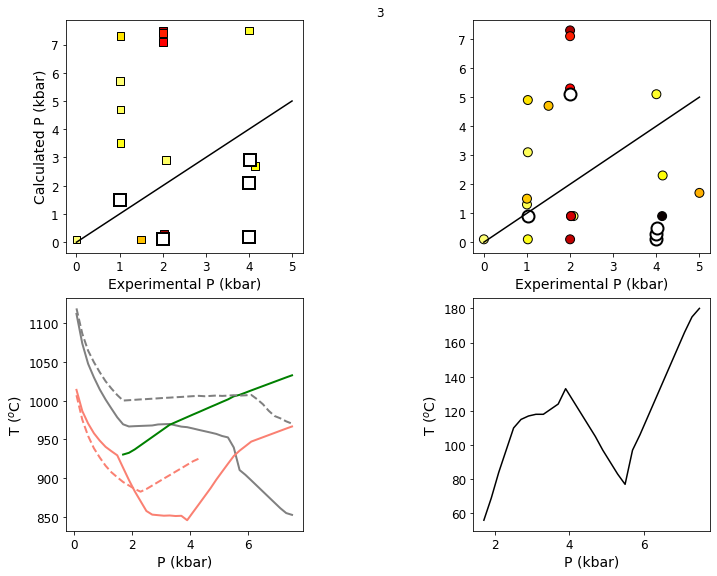

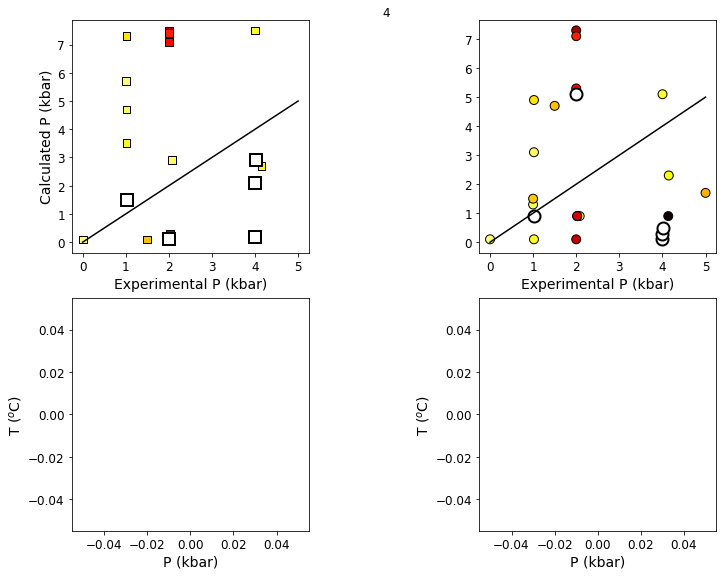

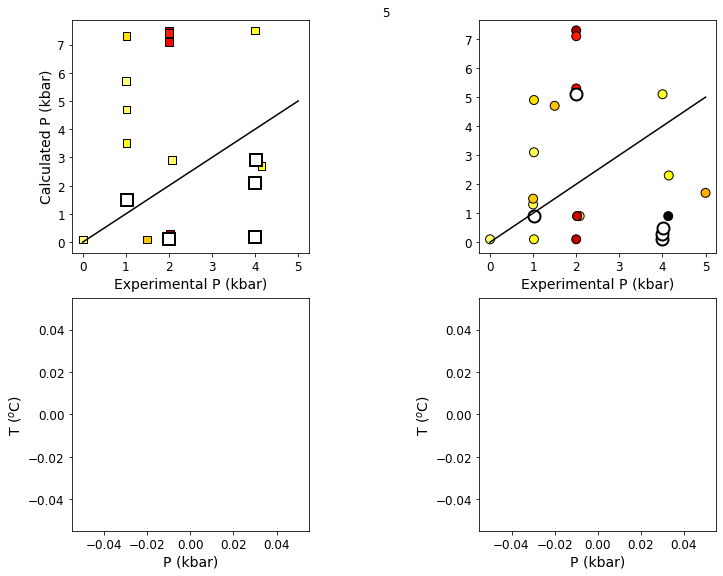

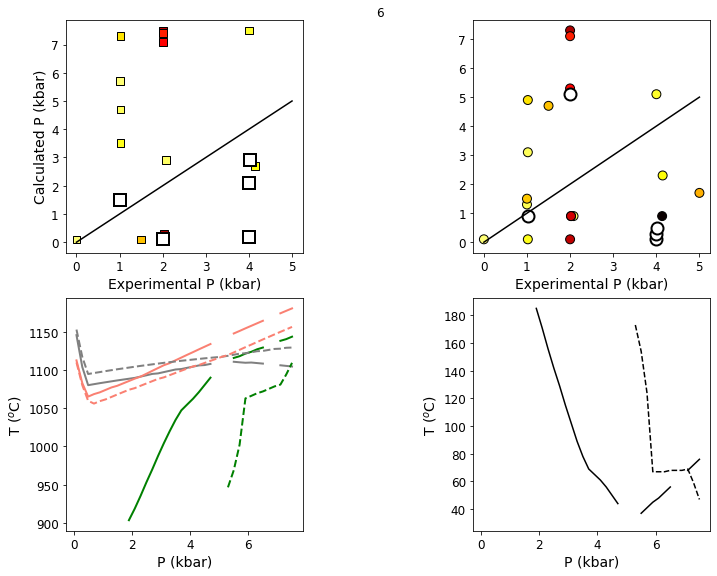

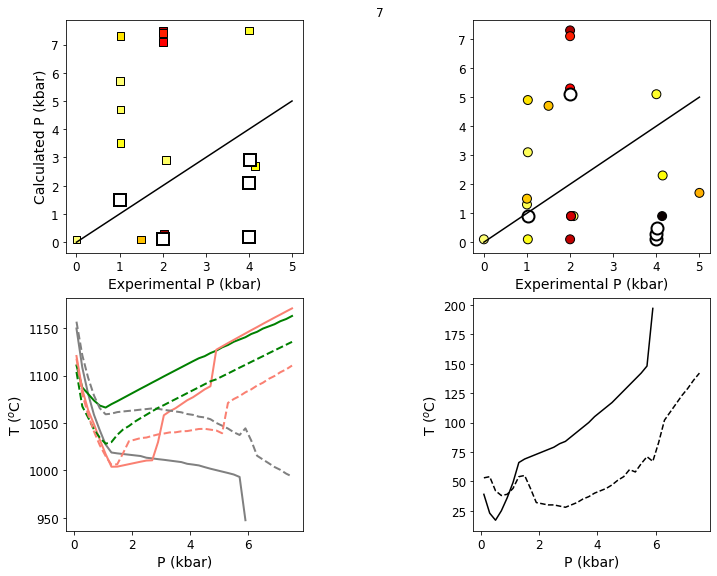

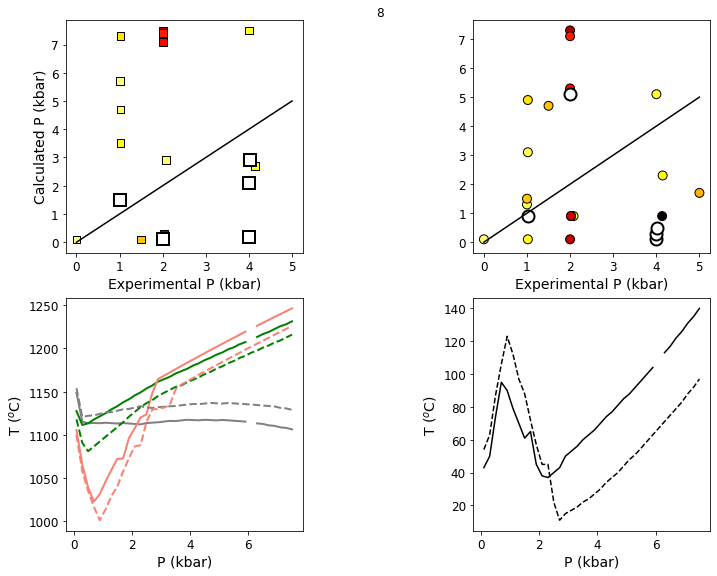

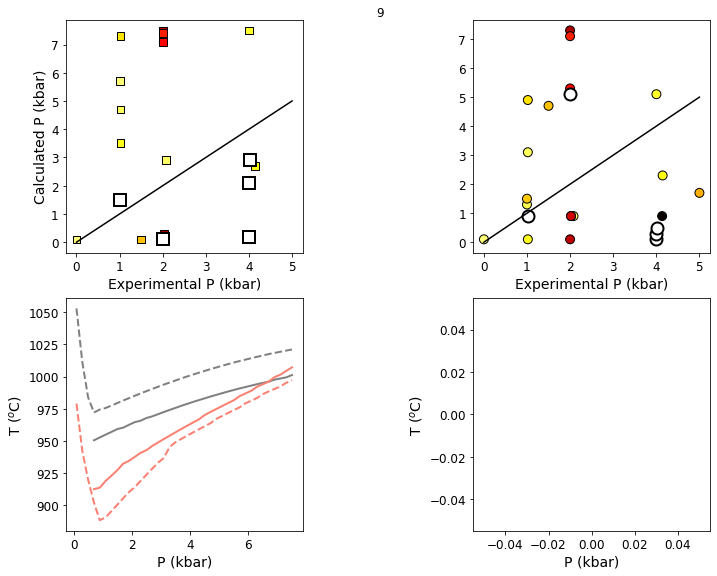

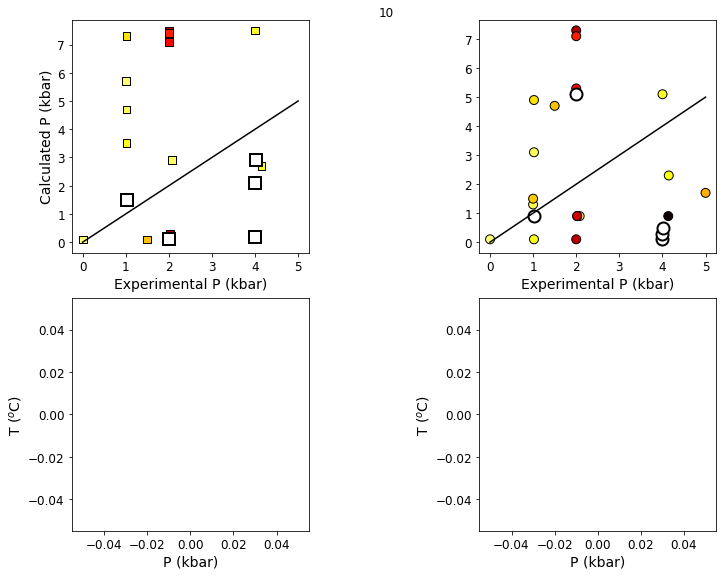

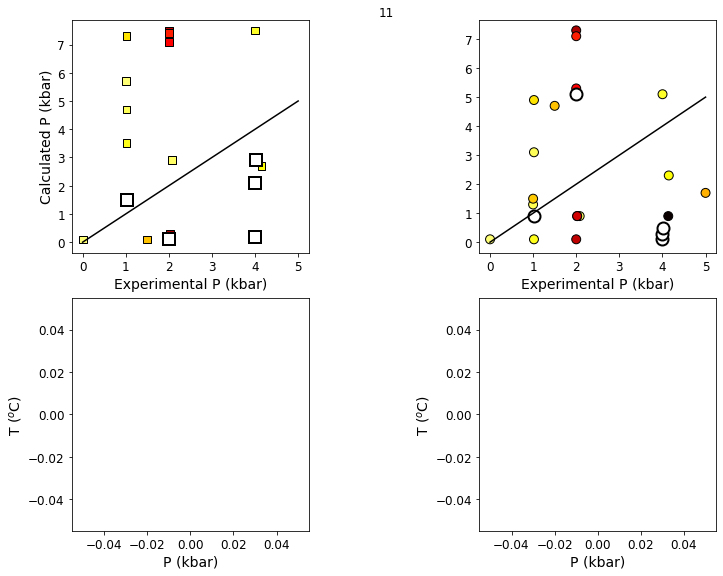

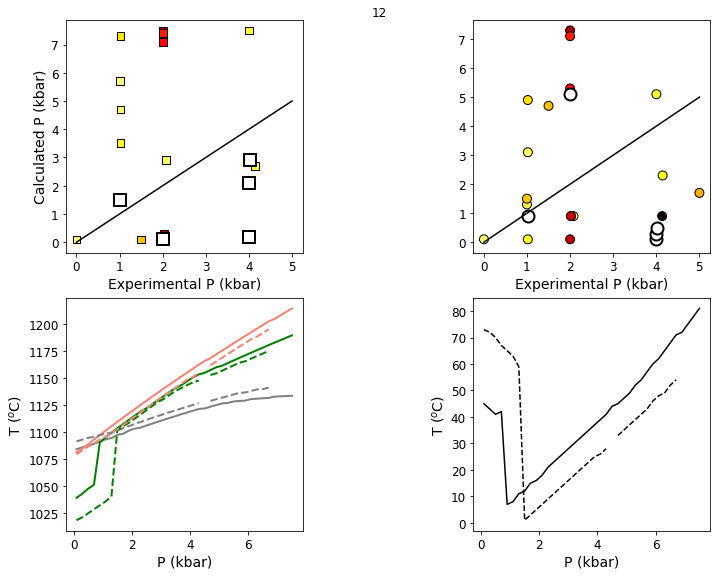

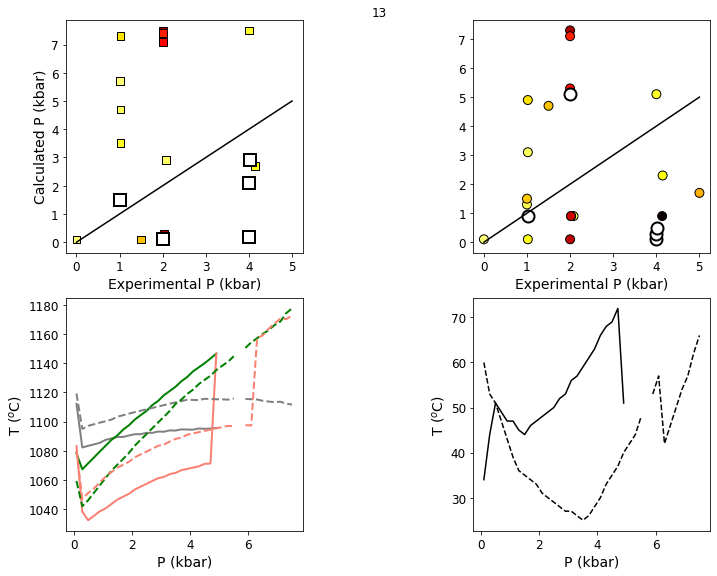

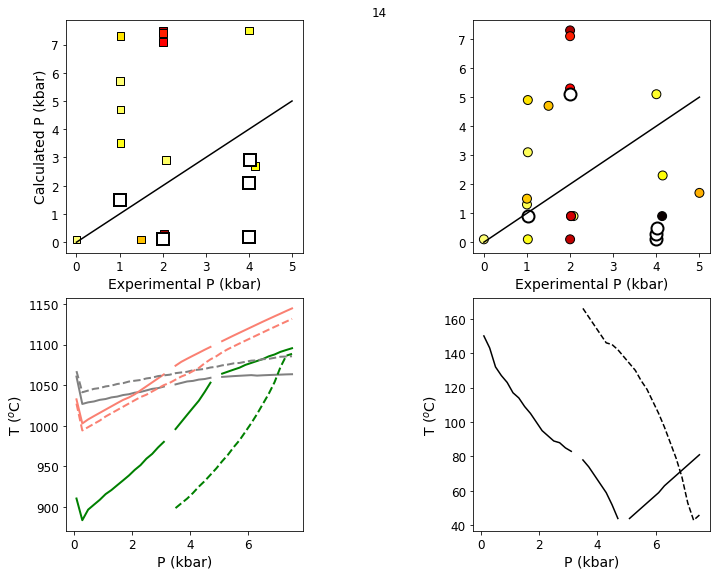

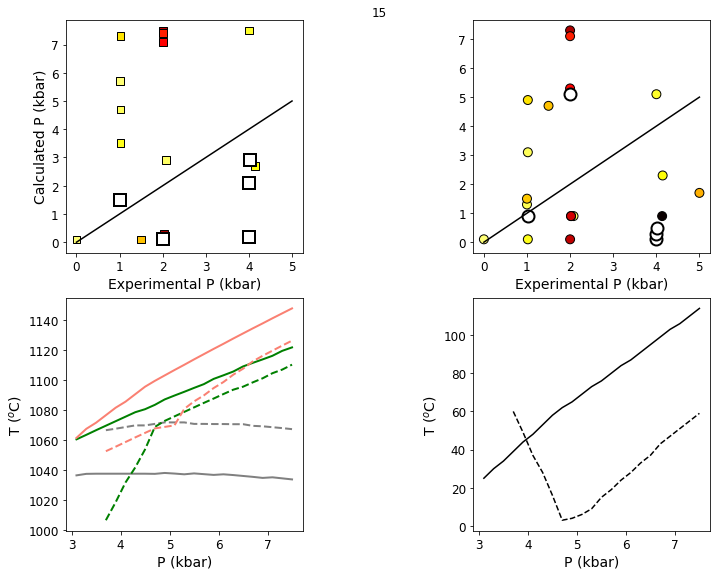

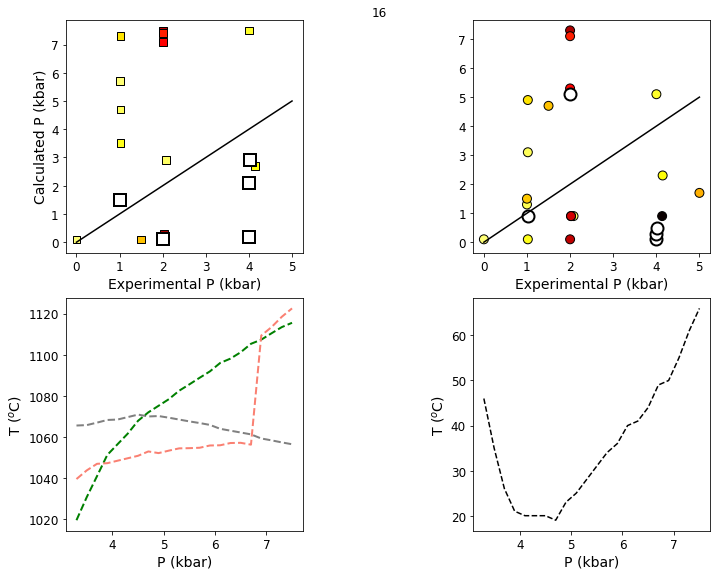

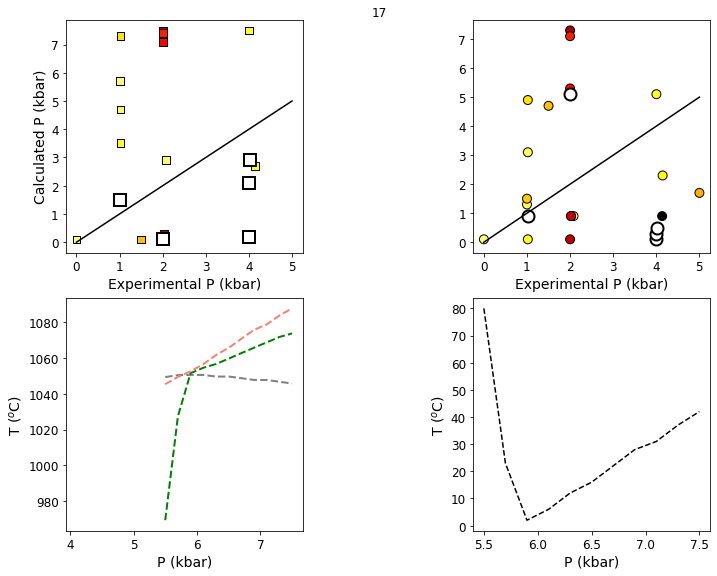

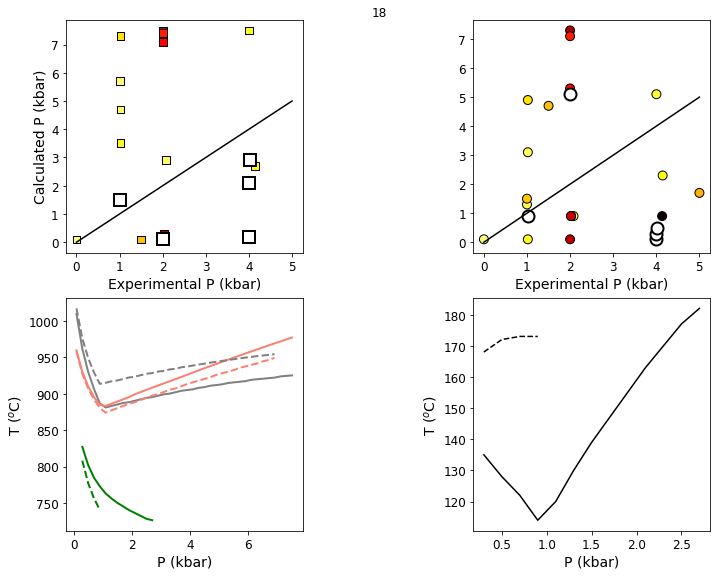

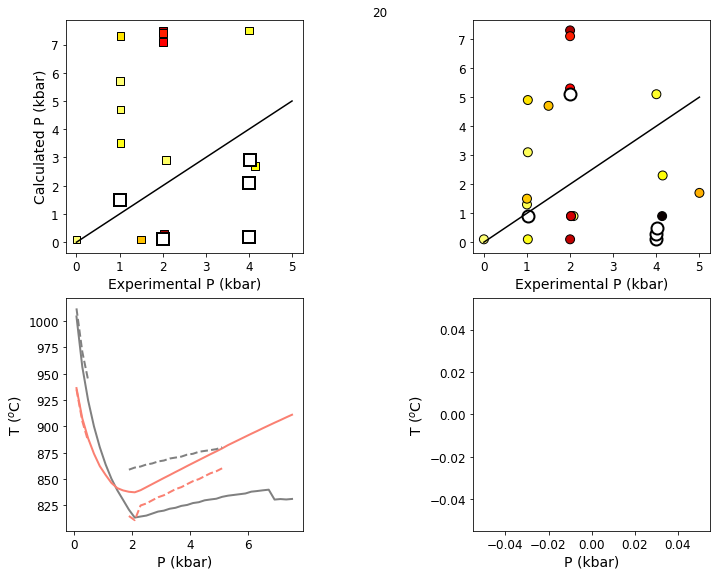

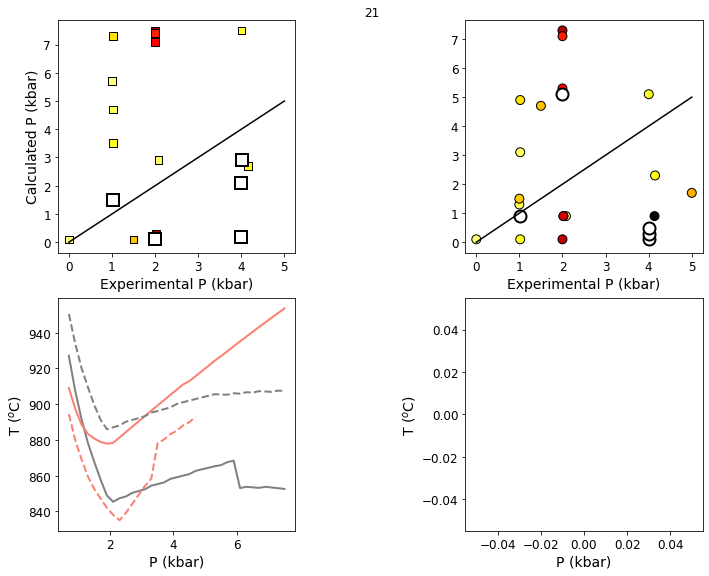

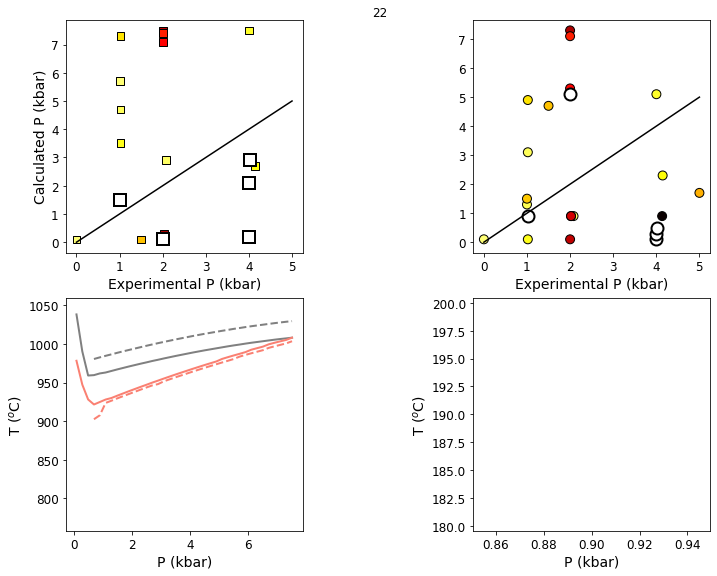

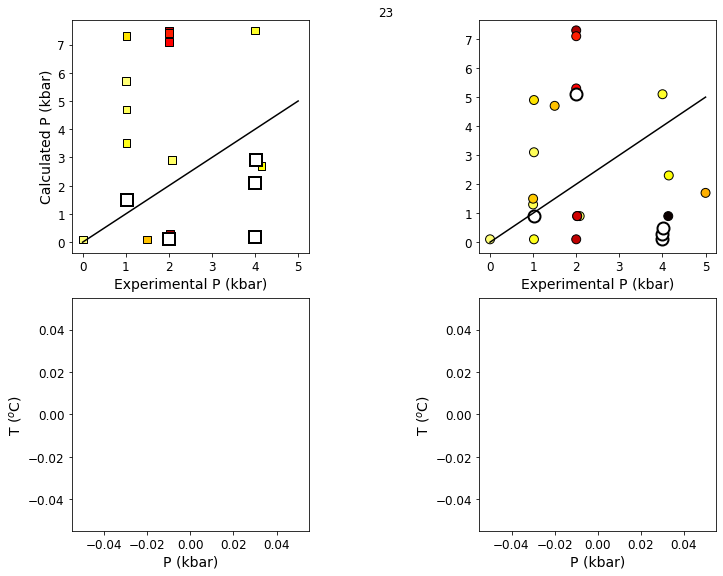

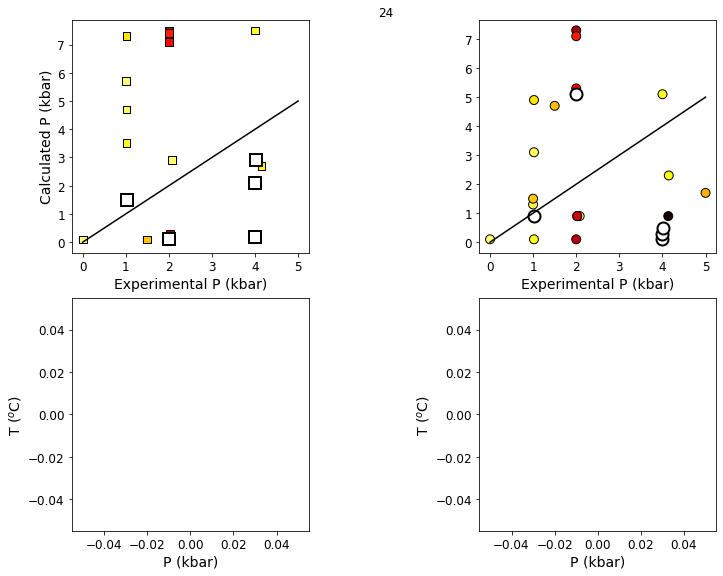

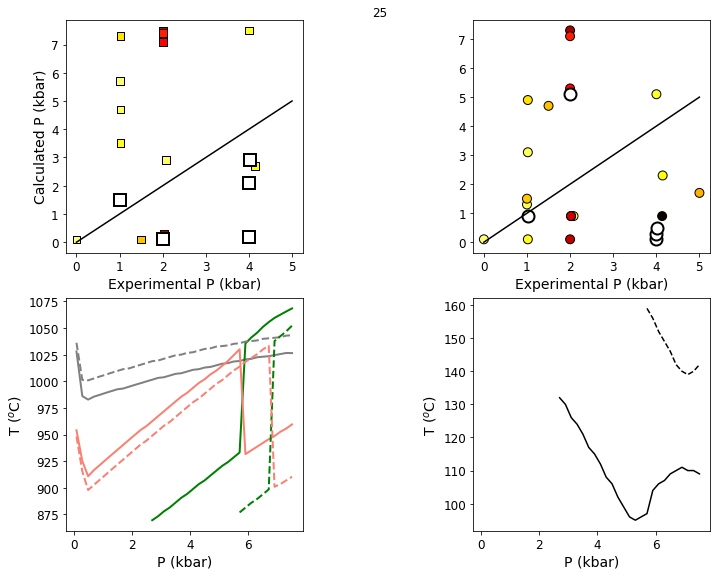

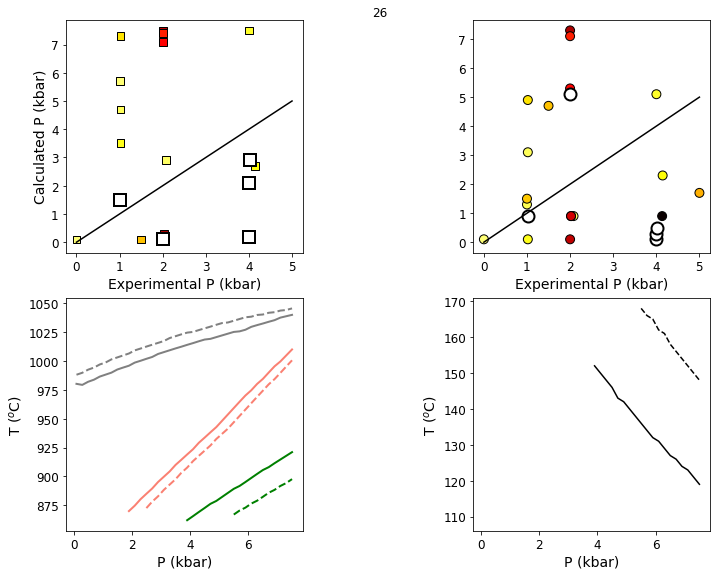

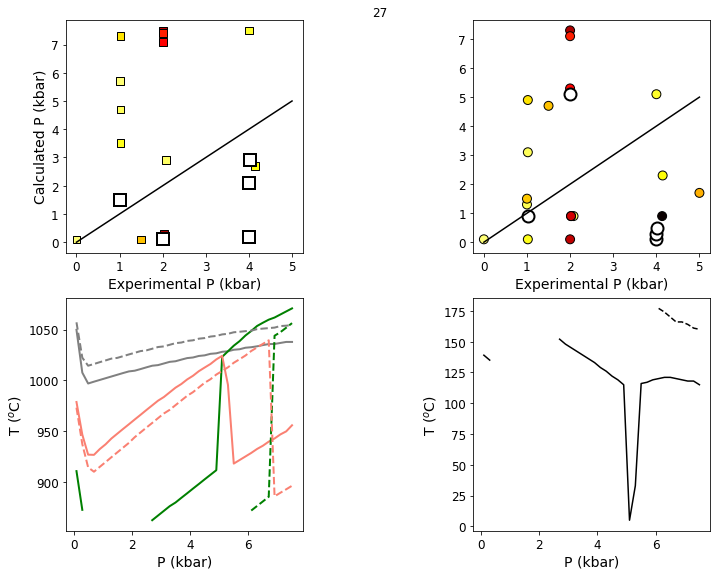

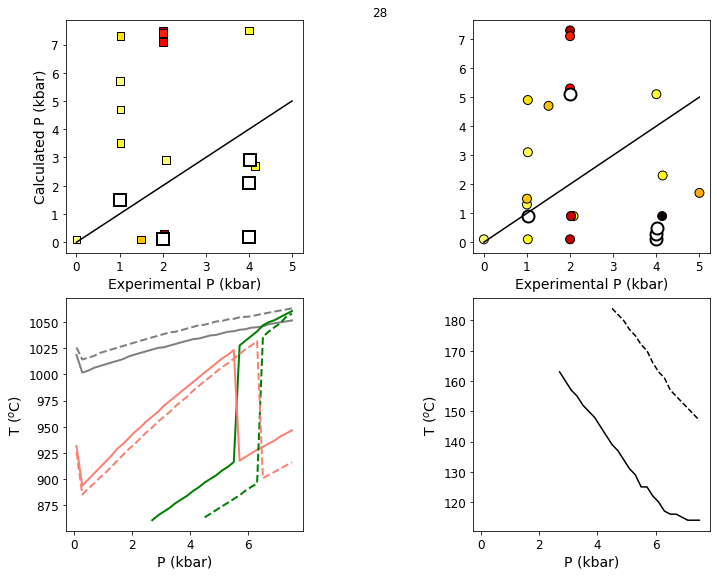

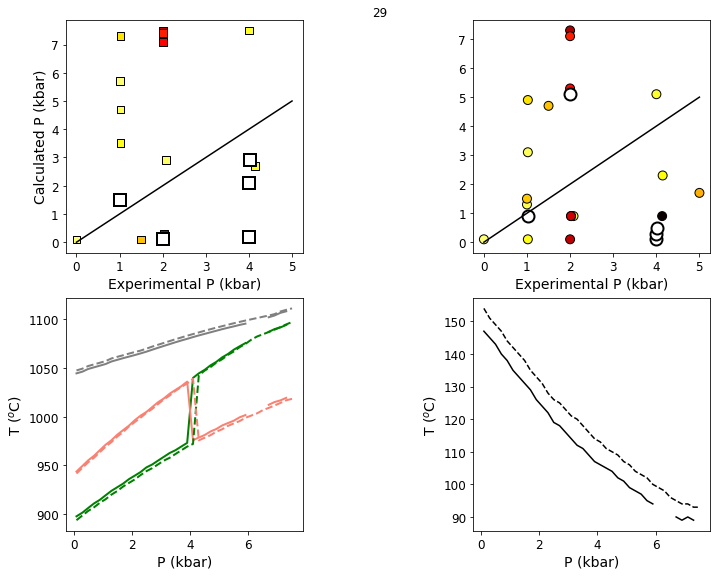

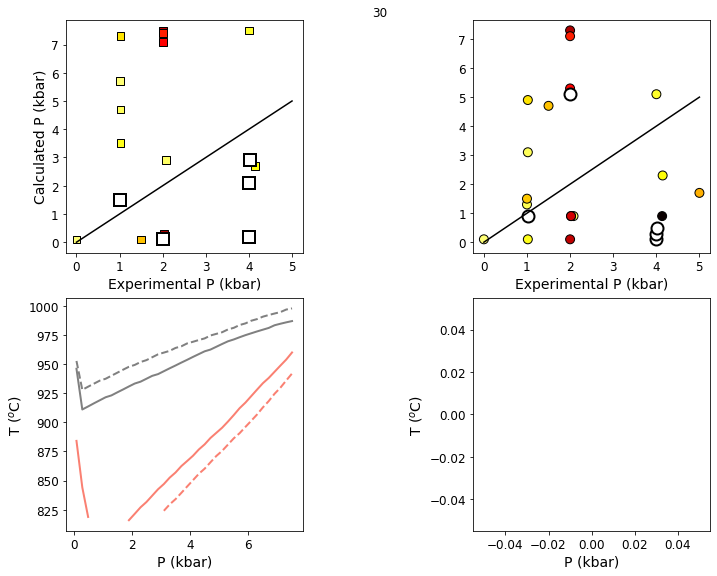

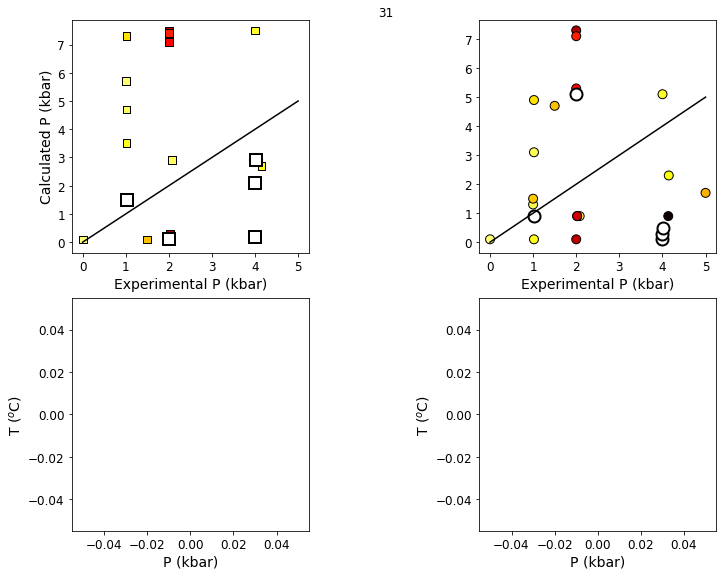

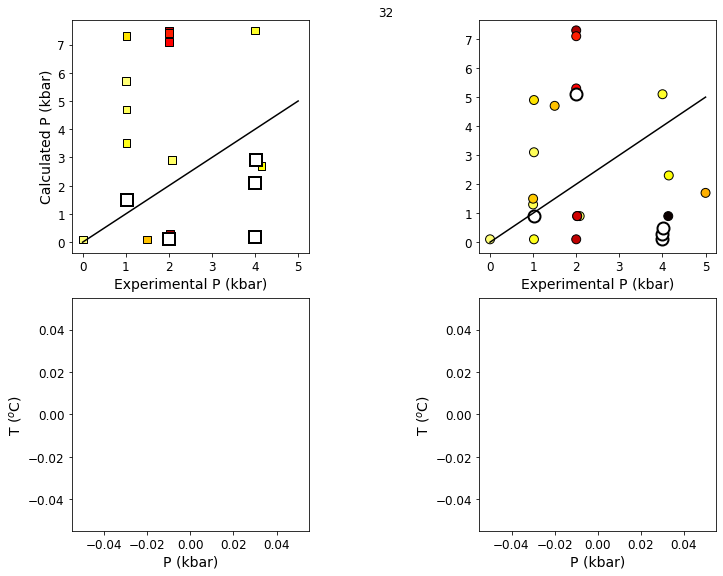

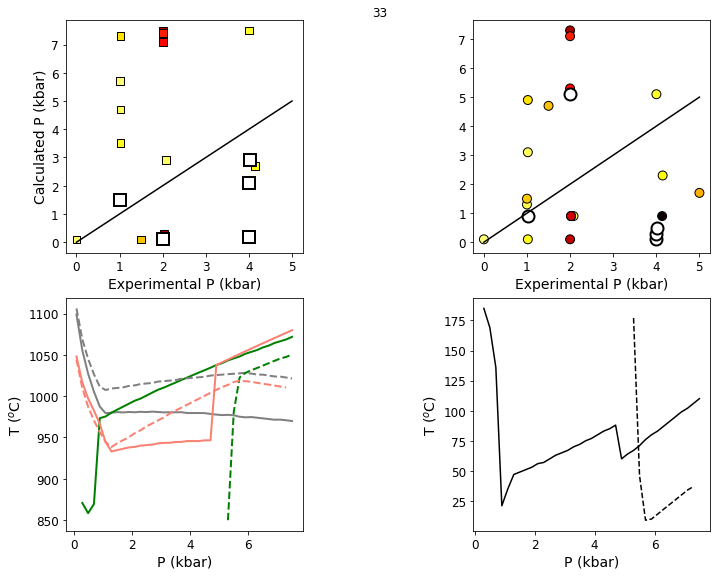

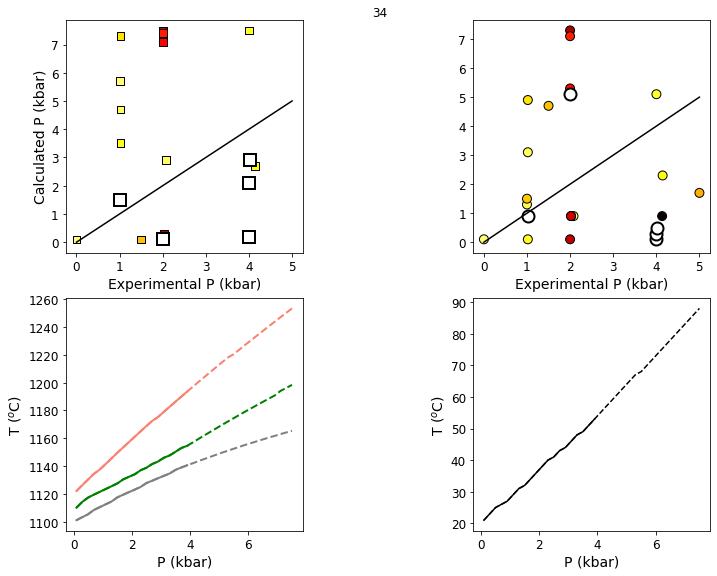

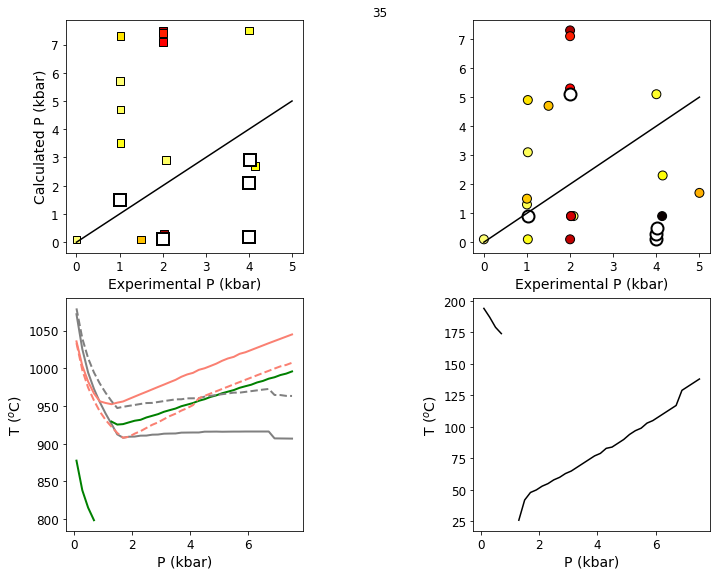

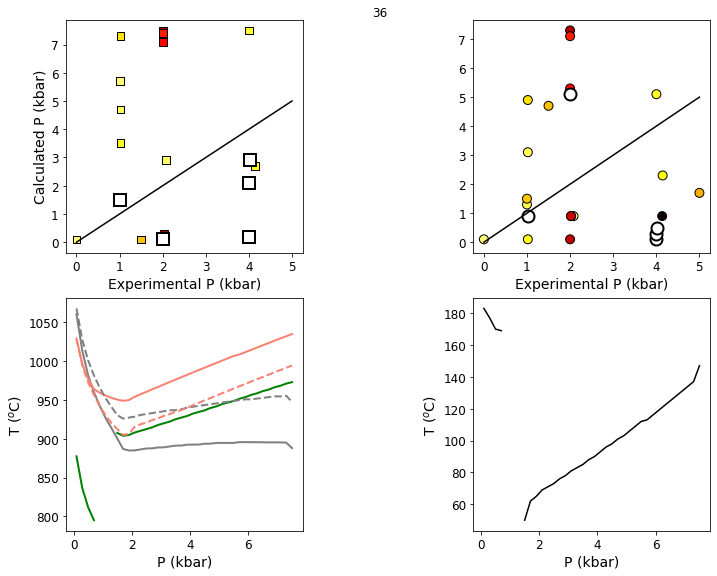

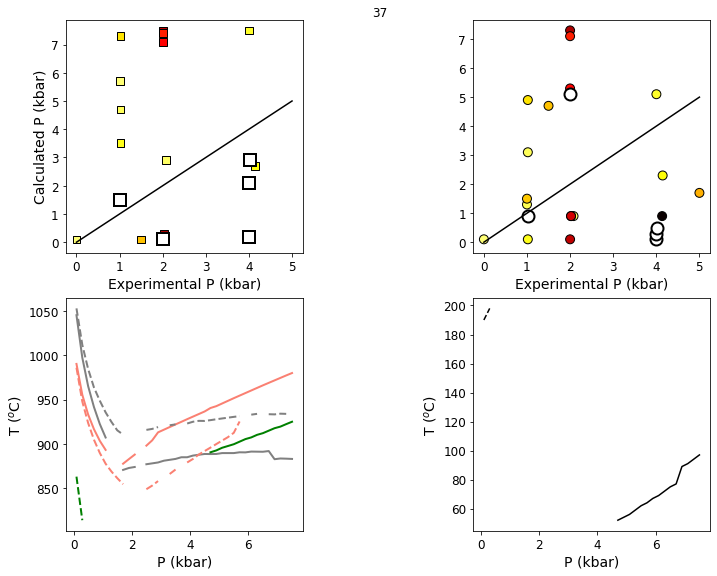

In [93]:
for i in P_results:
    sample = i
    f, a = plt.subplots(2,3, figsize = (10,8), gridspec_kw={'width_ratios': [2, 0.5, 2]} )
    f.tight_layout(pad = 2)
    a[0][1].set_visible(False)
    a[1][1].set_visible(False)
    f.suptitle(i)

    s = a[0][0].scatter(Comp['P_kbar_true'], Comp['P_kbar_calc'], 60, c = Comp['P_kbar_calc_min'], 
                 edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 's')
    a[0][2].scatter(Comp['P_kbar_true'], Comp['P_kbar_calc_v102'], 80, c = Comp['P_kbar_calc_v102_min'], 
                 edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 'o')
    a[0][0].plot([0,5],[0,5], '-k')
    a[0][0].set_xlabel('Experimental P (kbar)')
    a[0][0].set_ylabel('Calculated P (kbar)')
    #f.colorbar(s, ax=a[0][1], label='$\Delta$T')

    T_cut = 20
    # a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_min'] < T_cut], 
    #           Comp['P_kbar_calc'][Comp['P_kbar_calc_min'] < T_cut], 'sr', markeredgecolor = 'k', markersize = 10)
    # a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_v102_min'] < T_cut], 
    #           Comp['P_kbar_calc_v102'][Comp['P_kbar_calc_v102_min'] < T_cut], 'ob', markeredgecolor = 'k', markersize = 8)
    a[0][0].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_min'] < T_cut], 
                        Comp['P_kbar_calc'][Comp['P_kbar_calc_min'] < T_cut], 'sw', markersize = 12, markeredgecolor = 'k', mew = 2)
    a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_v102_min'] < T_cut], 
                    Comp['P_kbar_calc_v102'][Comp['P_kbar_calc_v102_min'] < T_cut], 'ow', markersize = 12, markeredgecolor = 'k', mew = 2)
    a[0][2].plot([0,5],[0,5], '-k')
    a[0][2].set_xlabel('Experimental P (kbar)')

    a[1][2].plot(P_bar, P_results_v102[sample]['Res_abc'][0,0,:], '-k')
    a[1][2].plot(P_bar, P_results[sample]['Res_abc'][0,0,:], '--k')
    a[1][2].set_ylabel('T ($^{o}$C)')
    a[1][2].set_xlabel('P (kbar)')

    #ax1 = a[1][0].twinx()
    a[1][0].plot(P_bar, P_results_v102[sample]['a_sat'][0,0,:], '-', linewidth = 2, color = [0.5,0.5,0.5])
    a[1][0].plot(P_bar, P_results_v102[sample]['b_sat'][0,0,:], '-g', linewidth = 2)
    a[1][0].plot(P_bar, P_results_v102[sample]['c_sat'][0,0,:], '-', linewidth = 2, color = 'salmon')
    #a[1][0].set_ylim([1000,1250])
    a[1][0].set_ylabel('T ($^{o}$C)')
    #a[1][0].set_yticks(ticks = [1050,1100,1150,1200,1250])
    a[1][0].set_xlabel('P (kbar)')

    a[1][0].plot(P_bar, P_results[sample]['a_sat'][0,0,:], '--', linewidth = 2, color = [0.5,0.5,0.5])
    a[1][0].plot(P_bar, P_results[sample]['b_sat'][0,0,:], '--g', linewidth = 2)
    a[1][0].plot(P_bar, P_results[sample]['c_sat'][0,0,:], '--', linewidth = 2, color = 'salmon')
    # ax1.set_ylim([850,1250])
    # ax1.set_yticks(ticks = [1050,1100,1150,1200,1250])

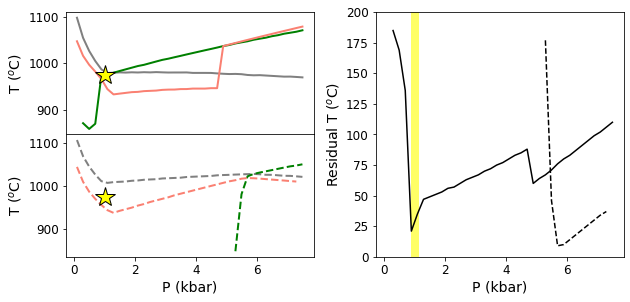

In [123]:
sample='33'
figure_mosaic="""
AC
BC
"""
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10, 4.5), sharex=True)
#axes['A'].axes.get_xaxis().set_visible(False)
plt.subplots_adjust(hspace = 0.0, wspace = 0.25)

axes['A'].plot(P_bar, P_results_v102[sample]['a_sat'][0,0,:], '-', linewidth = 2, color = [0.5,0.5,0.5])
axes['A'].plot(P_bar, P_results_v102[sample]['b_sat'][0,0,:], '-g', linewidth = 2)
axes['A'].plot(P_bar, P_results_v102[sample]['c_sat'][0,0,:], '-', linewidth = 2, color = 'salmon')
axes['A'].plot(Comp['P_kbar_true'].loc[int(sample)], Data['T_K'].loc[int(sample)]-273.15, '*k', 
               mfc = 'yellow', ms = 20)
axes['A'].set_ylabel('T ($^{o}$C)')

# axes['B'].plot(P_bar, P_results_v102[sample]['a_sat'][0,0,:], '-', linewidth = 1, alpha=0.5, color = [0.5,0.5,0.5])
# axes['B'].plot(P_bar, P_results_v102[sample]['b_sat'][0,0,:], '-g', linewidth = 1, alpha=0.5)
# axes['B'].plot(P_bar, P_results_v102[sample]['c_sat'][0,0,:], '-', linewidth = 1, alpha=0.5, color = 'salmon')

axes['B'].plot(P_bar, P_results[sample]['a_sat'][0,0,:], '--', linewidth = 2, color = [0.5,0.5,0.5])
axes['B'].plot(P_bar, P_results[sample]['b_sat'][0,0,:], '--g', linewidth = 2)
axes['B'].plot(P_bar, P_results[sample]['c_sat'][0,0,:], '--', linewidth = 2, color = 'salmon')
axes['B'].plot(Comp['P_kbar_true'].loc[int(sample)], Data['T_K'].loc[int(sample)]-273.15, '*k', 
               mfc = 'yellow', ms = 20)
axes['B'].set_ylabel('T ($^{o}$C)')
axes['B'].set_xlabel('P (kbar)')


axes['C'].plot([Comp['P_kbar_true'].loc[int(sample)],Comp['P_kbar_true'].loc[int(sample)]],
              [0,200], '-', alpha = 0.6, lw = 8, c = 'yellow')
axes['C'].plot(P_bar, P_results_v102[sample]['Res_abc'][0,0,:], '-k')
axes['C'].plot(P_bar, P_results[sample]['Res_abc'][0,0,:], '--k')
axes['C'].set_ylabel('Residual T ($^{o}$C)')
axes['C'].set_xlabel('P (kbar)')
axes['C'].set_ylim([0,200])

plt.savefig('CDE.pdf', dpi = 300)

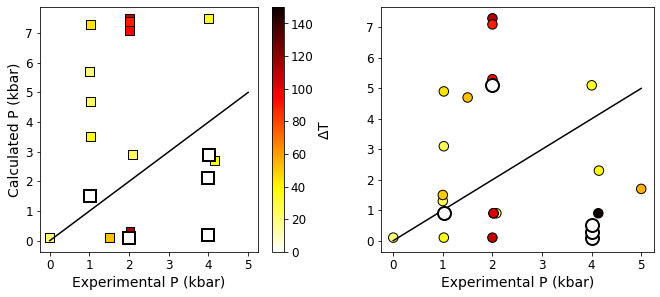

In [133]:
sample = '33'
f, a = plt.subplots(1,2, figsize=(11, 4.5))
plt.subplots_adjust(hspace = 0.0, wspace = 0.25)

a[0].plot([0,5],[0,5], '-k')
s = a[0].scatter(Comp['P_kbar_true'], Comp['P_kbar_calc'], 80, c = Comp['P_kbar_calc_min'], 
             edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 's')
a[0].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_min'] < T_cut], 
                    Comp['P_kbar_calc'][Comp['P_kbar_calc_min'] < T_cut], 'sw', markersize = 12, markeredgecolor = 'k', mew = 2)
a[0].set_xlabel('Experimental P (kbar)')
a[0].set_ylabel('Calculated P (kbar)')
f.colorbar(s, ax=a[0], label='$\Delta$T')

T_cut = 20
# a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_min'] < T_cut], 
#           Comp['P_kbar_calc'][Comp['P_kbar_calc_min'] < T_cut], 'sr', markeredgecolor = 'k', markersize = 10)
# a[0][2].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_v102_min'] < T_cut], 
#           Comp['P_kbar_calc_v102'][Comp['P_kbar_calc_v102_min'] < T_cut], 'ob', markeredgecolor = 'k', markersize = 8)
a[1].plot([0,5],[0,5], '-k')
a[1].scatter(Comp['P_kbar_true'], Comp['P_kbar_calc_v102'], 90, c = Comp['P_kbar_calc_v102_min'], 
             edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 'o')
a[1].plot(Comp['P_kbar_true'][Comp['P_kbar_calc_v102_min'] < T_cut], 
                Comp['P_kbar_calc_v102'][Comp['P_kbar_calc_v102_min'] < T_cut], 'ow', markersize = 13, markeredgecolor = 'k', mew = 2)

a[1].set_xlabel('Experimental P (kbar)')

plt.savefig('AB_cb.pdf', dpi = 300)

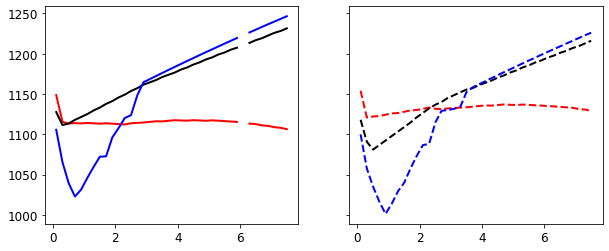

In [20]:
#P_results_v102['12']
P_bar = np.linspace(100,7500,38)/1000
sample = '8'
f, a = plt.subplots(1,2, figsize = (10,4), sharex = True, sharey = True)
a[0].plot(P_bar, P_results_v102[sample]['a_sat'][0,0,:], '-r', linewidth = 2)
a[0].plot(P_bar, P_results_v102[sample]['b_sat'][0,0,:], '-k', linewidth = 2)
a[0].plot(P_bar, P_results_v102[sample]['c_sat'][0,0,:], '-b', linewidth = 2)

a[1].plot(P_bar, P_results[sample]['a_sat'][0,0,:], '--r', linewidth = 2)
a[1].plot(P_bar, P_results[sample]['b_sat'][0,0,:], '--k', linewidth = 2)
a[1].plot(P_bar, P_results[sample]['c_sat'][0,0,:], '--b', linewidth = 2)

# a[1].plot(P_bar, P_results_v102[sample]['Res_abc'][0,0,:], 'or', linewidth = 2)
# a[1].plot(P_bar, P_results[sample]['Res_abc'][0,0,:], 'ob', linewidth = 2)

In [87]:
Comp.to_excel('MELTSmodelcomparisons_20221123.xlsx')

In [31]:
Presults = {}
P_bar = np.linspace(500, 7500, 36)

Comp['P_kbar_calc'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_min'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_max'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_curve'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_curve'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_calc'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_min'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_max'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
for i in range(len(Comp['SiO2_Liq'])):
    try:
        with open('LowPResults/Sample_' + str(i) + '.obj', 'rb') as f:
            res = pickle.load(f)
        
        res['P'] = res['H2O_melt'].copy()
        for k in range(len(res['P'][:,0,0])):
            res['P'][k,0,:] = P_bar
        
        Presults[str(i)] = res
        
        if res['Minimum']['Res'] < 20.0:
            try:
                Comp['P_kbar_calc'].loc[i] = np.nanmean(res['Minimum']['P'])/1000
                Comp['H2O_calc'].loc[i] = np.nanmean(res['Minimum']['H2O'])
                Comp['P_kbar_curve'].loc[i] = res['CurveMin']['Res_abc']['P_min']/1000
                Comp['H2O_curve'].loc[i] = res['CurveMin']['Res_abc']['H2O_min']
            except:
                Comp['P_kbar_calc'].loc[i] = res['Minimum']['P']/1000
                Comp['H2O_calc'].loc[i] = res['Minimum']['H2O']
                Comp['P_kbar_curve'].loc[i] = res['CurveMin']['Res_abc']['P_min']/1000
                Comp['H2O_curve'].loc[i] = res['CurveMin']['Res_abc']['H2O_min']
                
        if len(res['range'][np.where(res['range'] == 1.0)]) > 0:
            Comp['P_kbar_min'].loc[i] = np.nanmin(res['P'][np.where(res['range'] == 1.0)])/1000
            Comp['P_kbar_max'].loc[i] = np.nanmax(res['P'][np.where(res['range'] == 1.0)])/1000
            Comp['H2O_min'].loc[i] = np.nanmin(res['H2O_melt'][np.where(res['range'] == 1.0)])
            Comp['H2O_max'].loc[i] = np.nanmax(res['H2O_melt'][np.where(res['range'] == 1.0)])
            
        P = float(round(Comp['P_kbar_true'].loc[i])*1000)
        H2O_max = np.nanmax(res['H2O_melt'][res['P'] <= P])
        
        if H2O_max < Comp['H2O_Liq'].loc[i]:
            Comp['H2O_Liq'].loc[i] = H2O_max
            
        
    except:
        pass

In [32]:
res['P']

array([[[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500., 3700., 3900.,
         4100., 4300., 4500., 4700., 4900., 5100., 5300., 5500., 5700.,
         5900., 6100., 6300., 6500., 6700., 6900., 7100., 7300., 7500.]],

       [[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500., 3700., 3900.,
         4100., 4300., 4500., 4700., 4900., 5100., 5300., 5500., 5700.,
         5900., 6100., 6300., 6500., 6700., 6900., 7100., 7300., 7500.]],

       [[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500., 3700., 3900.,
         4100., 4300., 4500., 4700., 4900., 5100., 5300., 5500., 5700.,
         5900., 6100., 6300., 6500., 6700., 6900., 7100., 7300., 7500.]],

       [[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500

Text(0, 0.5, 'Calculated H$_{2}$O (wt%)')

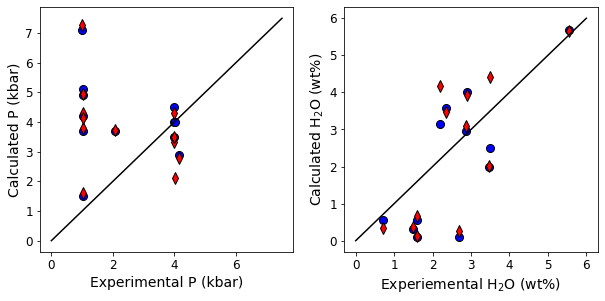

In [33]:
f, a = plt.subplots(1,2, figsize = (10,4.5))
#a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_max'], '^k', markerfacecolor = 'red', markersize = 10, alpha = 0.6)
#a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_min'], 'vk', markerfacecolor = 'yellow', markersize = 10, alpha = 0.6)
a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_calc'], 'ok', markerfacecolor = 'blue', markersize = 8)
a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_curve'], 'dk', markerfacecolor = 'red', markersize = 8)
a[0].plot([0,7.5],[0,7.5], '-k')
a[0].set_xlabel('Experimental P (kbar)')
a[0].set_ylabel('Calculated P (kbar)')


#a[1].plot(Comp['H2O_Liq'], Comp['H2O_max'], '^k', markerfacecolor = 'red', markersize = 10, alpha = 0.6)
#a[1].plot(Comp['H2O_Liq'], Comp['H2O_min'], 'vk', markerfacecolor = 'yellow', markersize = 10, alpha = 0.6)
a[1].plot(Comp['H2O_Liq'], Comp['H2O_calc'], 'ok', markerfacecolor = 'blue', markersize = 8)
a[1].plot(Comp['H2O_Liq'], Comp['H2O_curve'], 'dk', markerfacecolor = 'red', markersize = 8)
a[1].plot([0,6],[0,6], '-k')
a[1].set_xlabel('Experiemental H$_{2}$O (wt%)')
a[1].set_ylabel('Calculated H$_{2}$O (wt%)')

In [34]:
Comp['H2O_offset'] = Comp['H2O_Liq'] - Comp['H2O_calc']
Comp['P_kbar_offset'] = Comp['P_kbar_true'] - Comp['P_kbar_calc']

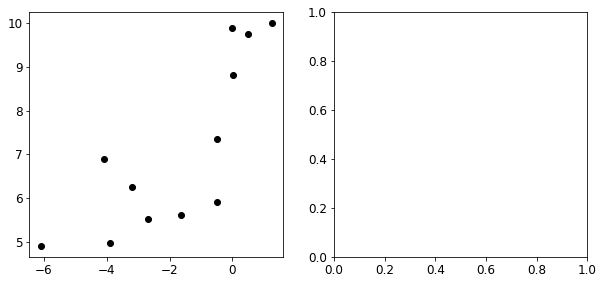

In [42]:
f, a = plt.subplots(1,2, figsize = (10,4.5))
a[0].plot(Comp['P_kbar_offset'], Comp['_Liq'], 'ok')

In [ ]:
#Comp.to_excel('P2P_results.xlsx')
H2O_Liq = np.linspace(0.1, 6, 14)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']
Results = M.findSaturationPressure(comp = Comp.loc[1].to_dict(), 
                                   Model = "MELTSv1.0.2", 
                                   cores = 20,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1100,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 12,
                                   H2O_Liq = H2O_Liq,
                                   find_range = True,
                                  find_min = True)